# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

# Load Dataset

In [2]:
df = pd.read_csv('electric_vehicle_analytics.csv')
df

,Vehicle_ID,Make,Model,Year,Region,Vehicle_Type,Battery_Capacity_kWh,Battery_Health_%,Range_km,Charging_Power_kW,...,Max_Speed_kmh,Acceleration_0_100_kmh_sec,Temperature_C,Usage_Type,CO2_Saved_tons,Maintenance_Cost_USD,Insurance_Cost_USD,Electricity_Cost_USD_per_kWh,Monthly_Charging_Cost_USD,Resale_Value_USD
0,1,Nissan,Leaf,2021,Asia,SUV,101.7,75.5,565,153.6,...,233,8.10,-9.0,Personal,14.13,969,843,0.30,375.55,26483
1,2,Nissan,Leaf,2020,Australia,Sedan,30.1,99.8,157,157.2,...,221,9.83,1.6,Personal,19.41,1157,1186,0.25,532.02,11287
2,3,Hyundai,Kona Electric,2021,North America,SUV,118.5,84.0,677,173.6,...,138,3.60,1.5,Fleet,29.39,291,1890,0.26,1291.68,34023
3,4,Audi,Q4 e-tron,2022,Europe,Hatchback,33.1,97.3,149,169.3,...,192,8.97,12.5,Fleet,6.96,401,2481,0.33,234.44,14398
4,5,Tesla,Model 3,2022,Australia,Truck,81.3,85.6,481,212.8,...,189,7.03,-3.0,Commercial,2.06,214,2336,0.10,32.61,23033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,Mercedes,EQS,2021,North America,SUV,57.2,84.0,239,102.2,...,154,7.98,33.7,Personal,15.65,1645,2357,0.33,767.05,16749
2996,2997,Ford,Mustang Mach-E,2022,Europe,Hatchback,98.4,83.1,498,160.6,...,243,7.22,13.7,Fleet,1.82,289,868,0.32,75.35,30080
2997,2998,Kia,Niro EV,2024,Europe,Truck,35.1,82.1,189,18.1,...,175,4.26,5.8,Fleet,26.29,1013,695,0.32,1188.15,16286
2998,2999,Mercedes,EQC,2015,North America,Truck,69.4,98.4,336,94.7,...,185,9.34,-7.6,Commercial,24.95,1843,1905,0.20,780.03,19581


### Explore The Dataset

In [3]:
df.shape

(3000, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Vehicle_ID                        3000 non-null   int64  
 1   Make                              3000 non-null   object 
 2   Model                             3000 non-null   object 
 3   Year                              3000 non-null   int64  
 4   Region                            3000 non-null   object 
 5   Vehicle_Type                      3000 non-null   object 
 6   Battery_Capacity_kWh              3000 non-null   float64
 7   Battery_Health_%                  3000 non-null   float64
 8   Range_km                          3000 non-null   int64  
 9   Charging_Power_kW                 3000 non-null   float64
 10  Charging_Time_hr                  3000 non-null   float64
 11  Charge_Cycles                     3000 non-null   int64  
 12  Energy

In [5]:
df.describe()

,Vehicle_ID,Year,Battery_Capacity_kWh,Battery_Health_%,Range_km,Charging_Power_kW,Charging_Time_hr,Charge_Cycles,Energy_Consumption_kWh_per_100km,Mileage_km,Avg_Speed_kmh,Max_Speed_kmh,Acceleration_0_100_kmh_sec,Temperature_C,CO2_Saved_tons,Maintenance_Cost_USD,Insurance_Cost_USD,Electricity_Cost_USD_per_kWh,Monthly_Charging_Cost_USD,Resale_Value_USD
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,2019.499667,74.810100,85.030000,374.414667,129.301000,1.203570,1107.009667,18.589740,125209.685667,65.674067,190.678333,6.707073,14.794133,15.025163,1104.199000,1495.469333,0.216467,418.814683,22257.038000
std,866.169729,2.848047,25.734079,8.589526,137.184112,68.742745,1.421866,510.834590,3.767421,70465.774772,20.305364,35.184232,1.880355,14.407087,8.455850,521.530356,585.919978,0.078383,312.389226,5594.979382
min,1.000000,2015.000000,30.000000,70.000000,121.000000,11.100000,0.140000,200.000000,12.000000,5046.000000,30.000000,130.000000,3.500000,-10.000000,0.610000,200.000000,500.000000,0.080000,7.990000,8506.000000
25%,750.750000,2017.000000,53.000000,77.775000,260.000000,70.900000,0.460000,674.750000,15.320000,65140.500000,48.000000,159.000000,5.080000,2.400000,7.817500,652.000000,984.750000,0.150000,175.485000,17813.000000
50%,1500.500000,2020.000000,74.850000,85.250000,371.000000,126.700000,0.720000,1116.000000,18.700000,125965.000000,65.600000,191.500000,6.720000,14.550000,15.115000,1109.000000,1496.000000,0.220000,347.285000,22154.000000
75%,2250.250000,2022.000000,96.900000,92.300000,476.250000,187.975000,1.292500,1535.250000,21.830000,184764.750000,83.525000,222.000000,8.310000,27.500000,22.170000,1569.000000,2019.250000,0.280000,595.152500,26732.750000
max,3000.000000,2024.000000,120.000000,100.000000,713.000000,250.000000,12.140000,1997.000000,24.990000,249987.000000,100.000000,249.000000,10.000000,40.000000,30.000000,1999.000000,2498.000000,0.350000,1643.700000,35521.000000


In [6]:
df.nunique()

Vehicle_ID                          3000
Make                                  10
Model                                 23
Year                                  10
Region                                 4
Vehicle_Type                           4
Battery_Capacity_kWh                 878
Battery_Health_%                     301
Range_km                             547
Charging_Power_kW                   1708
Charging_Time_hr                     452
Charge_Cycles                       1455
Energy_Consumption_kWh_per_100km    1165
Mileage_km                          2979
Avg_Speed_kmh                        693
Max_Speed_kmh                        120
Acceleration_0_100_kmh_sec           644
Temperature_C                        501
Usage_Type                             3
CO2_Saved_tons                      1895
Maintenance_Cost_USD                1481
Insurance_Cost_USD                  1547
Electricity_Cost_USD_per_kWh          28
Monthly_Charging_Cost_USD           2953
Resale_Value_USD

## Exploratory Data Analysis

In [7]:
df.isna().sum()

Vehicle_ID                          0
Make                                0
Model                               0
Year                                0
Region                              0
Vehicle_Type                        0
Battery_Capacity_kWh                0
Battery_Health_%                    0
Range_km                            0
Charging_Power_kW                   0
Charging_Time_hr                    0
Charge_Cycles                       0
Energy_Consumption_kWh_per_100km    0
Mileage_km                          0
Avg_Speed_kmh                       0
Max_Speed_kmh                       0
Acceleration_0_100_kmh_sec          0
Temperature_C                       0
Usage_Type                          0
CO2_Saved_tons                      0
Maintenance_Cost_USD                0
Insurance_Cost_USD                  0
Electricity_Cost_USD_per_kWh        0
Monthly_Charging_Cost_USD           0
Resale_Value_USD                    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.fillna(0, inplace=True)
df

,Vehicle_ID,Make,Model,Year,Region,Vehicle_Type,Battery_Capacity_kWh,Battery_Health_%,Range_km,Charging_Power_kW,...,Max_Speed_kmh,Acceleration_0_100_kmh_sec,Temperature_C,Usage_Type,CO2_Saved_tons,Maintenance_Cost_USD,Insurance_Cost_USD,Electricity_Cost_USD_per_kWh,Monthly_Charging_Cost_USD,Resale_Value_USD
0,1,Nissan,Leaf,2021,Asia,SUV,101.7,75.5,565,153.6,...,233,8.10,-9.0,Personal,14.13,969,843,0.30,375.55,26483
1,2,Nissan,Leaf,2020,Australia,Sedan,30.1,99.8,157,157.2,...,221,9.83,1.6,Personal,19.41,1157,1186,0.25,532.02,11287
2,3,Hyundai,Kona Electric,2021,North America,SUV,118.5,84.0,677,173.6,...,138,3.60,1.5,Fleet,29.39,291,1890,0.26,1291.68,34023
3,4,Audi,Q4 e-tron,2022,Europe,Hatchback,33.1,97.3,149,169.3,...,192,8.97,12.5,Fleet,6.96,401,2481,0.33,234.44,14398
4,5,Tesla,Model 3,2022,Australia,Truck,81.3,85.6,481,212.8,...,189,7.03,-3.0,Commercial,2.06,214,2336,0.10,32.61,23033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,Mercedes,EQS,2021,North America,SUV,57.2,84.0,239,102.2,...,154,7.98,33.7,Personal,15.65,1645,2357,0.33,767.05,16749
2996,2997,Ford,Mustang Mach-E,2022,Europe,Hatchback,98.4,83.1,498,160.6,...,243,7.22,13.7,Fleet,1.82,289,868,0.32,75.35,30080
2997,2998,Kia,Niro EV,2024,Europe,Truck,35.1,82.1,189,18.1,...,175,4.26,5.8,Fleet,26.29,1013,695,0.32,1188.15,16286
2998,2999,Mercedes,EQC,2015,North America,Truck,69.4,98.4,336,94.7,...,185,9.34,-7.6,Commercial,24.95,1843,1905,0.20,780.03,19581


## Visualization

In [10]:
print('Columns in the dataset:')
print(df.columns.tolist())

Columns in the dataset:
['Vehicle_ID', 'Make', 'Model', 'Year', 'Region', 'Vehicle_Type', 'Battery_Capacity_kWh', 'Battery_Health_%', 'Range_km', 'Charging_Power_kW', 'Charging_Time_hr', 'Charge_Cycles', 'Energy_Consumption_kWh_per_100km', 'Mileage_km', 'Avg_Speed_kmh', 'Max_Speed_kmh', 'Acceleration_0_100_kmh_sec', 'Temperature_C', 'Usage_Type', 'CO2_Saved_tons', 'Maintenance_Cost_USD', 'Insurance_Cost_USD', 'Electricity_Cost_USD_per_kWh', 'Monthly_Charging_Cost_USD', 'Resale_Value_USD']


In [11]:
num_cols = ['Battery_Capacity_kWh', 'Battery_Health_%', 'Range_km', 'Charging_Power_kW', 'Charging_Time_hr', 'Charge_Cycles', 'Energy_Consumption_kWh_per_100km', 'Mileage_km', 'Avg_Speed_kmh', 'Max_Speed_kmh', 'Acceleration_0_100_kmh_sec', 'Temperature_C', 'CO2_Saved_tons', 'Maintenance_Cost_USD', 'Insurance_Cost_USD', 'Electricity_Cost_USD_per_kWh', 'Monthly_Charging_Cost_USD', 'Resale_Value_USD']
cat_cols = ['Make', 'Model', 'Region', 'Vehicle_Type',  'Usage_Type']

print(len(num_cols))
print(len(cat_cols))

18
5


### 1. Histogram Of Num_Cols

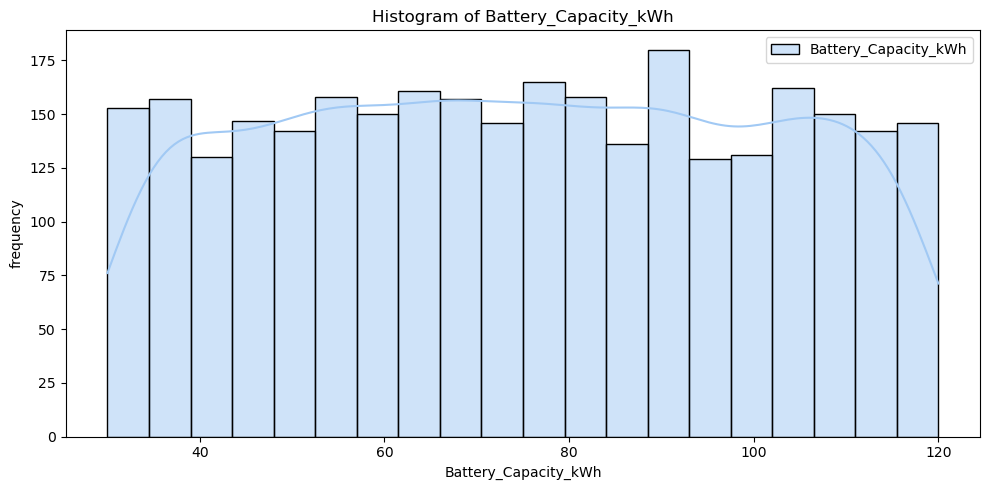

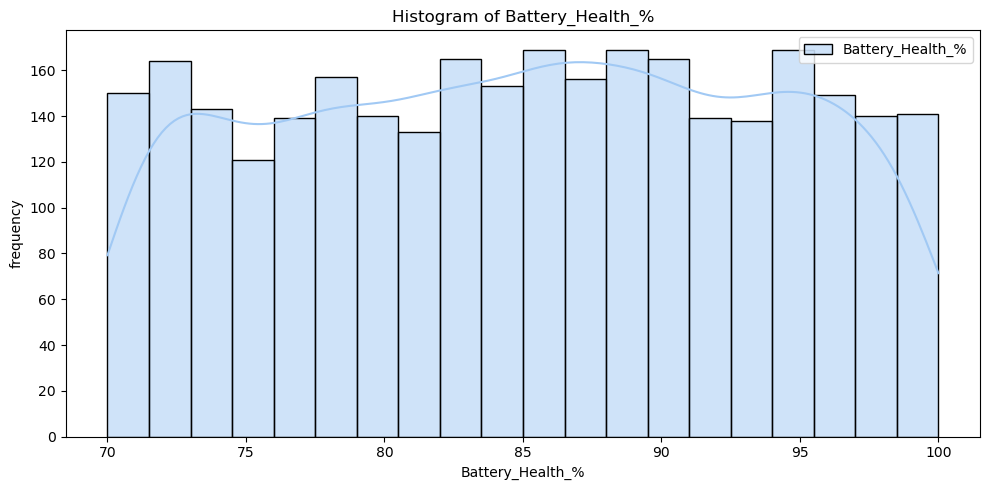

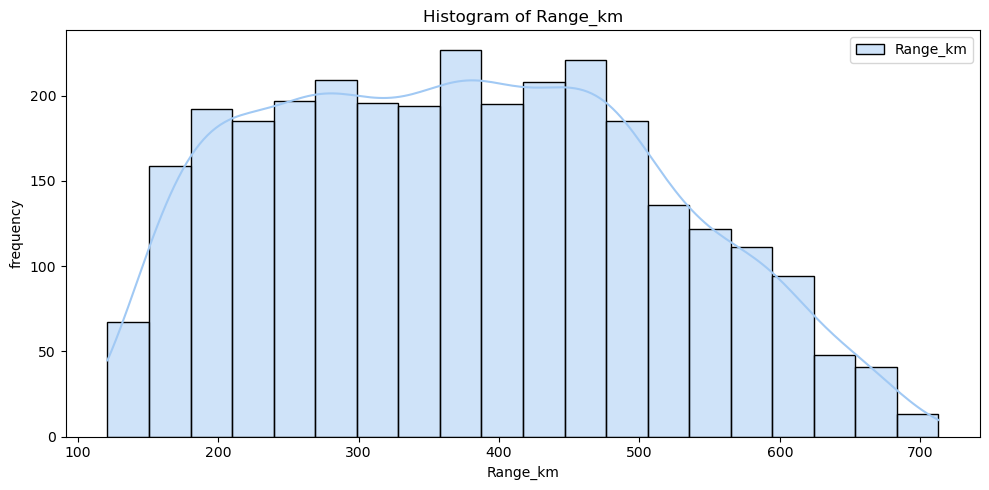

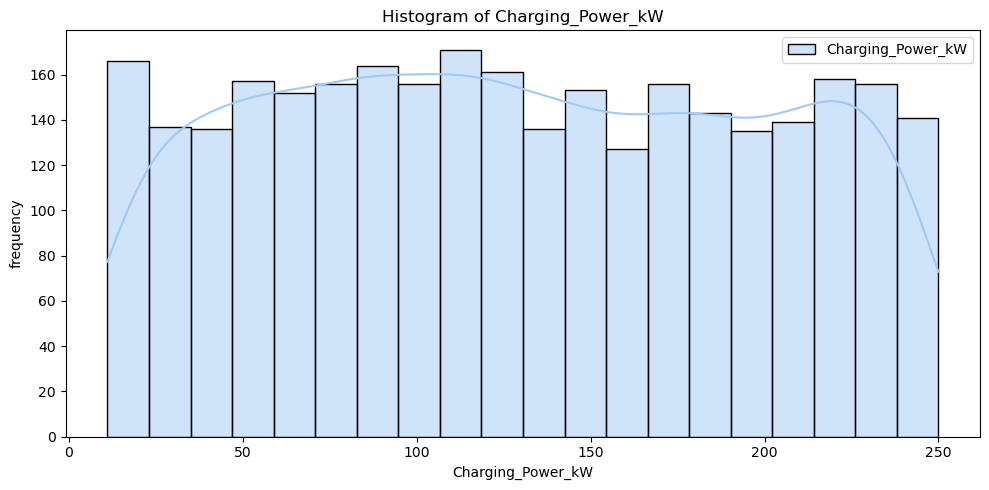

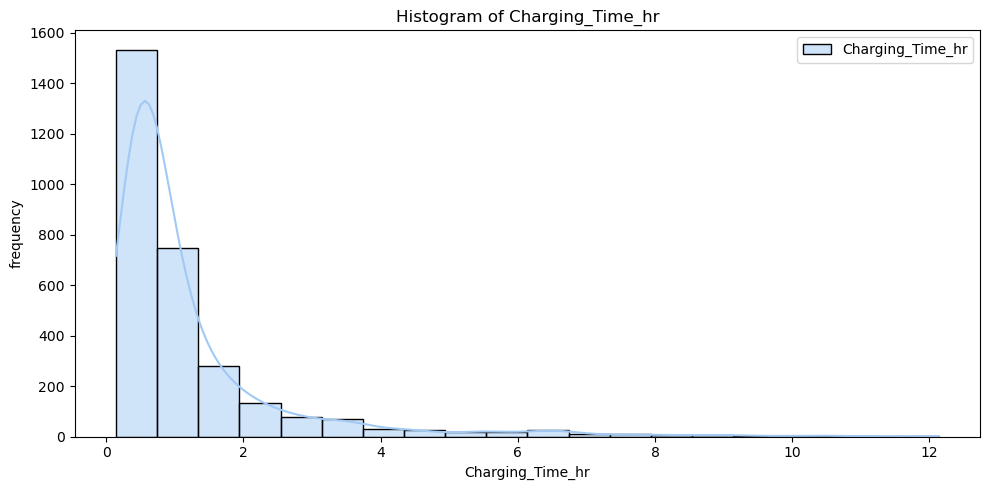

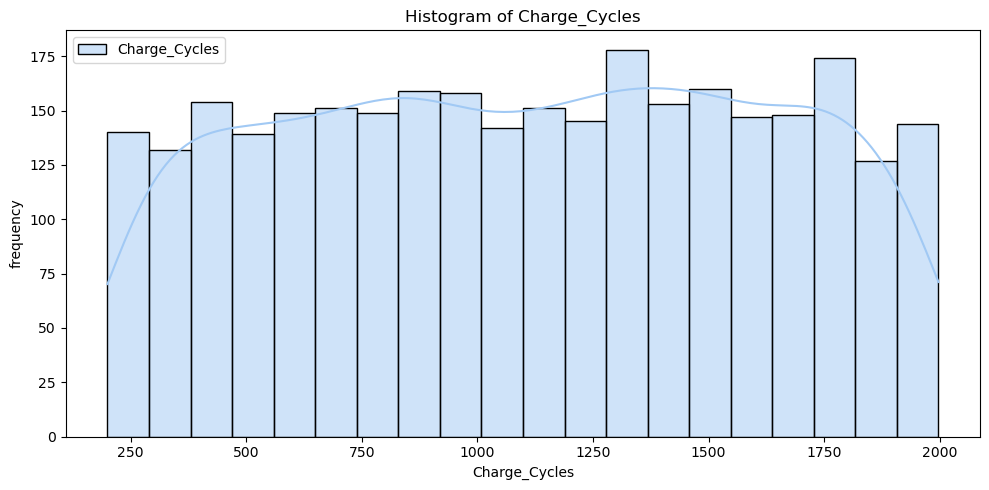

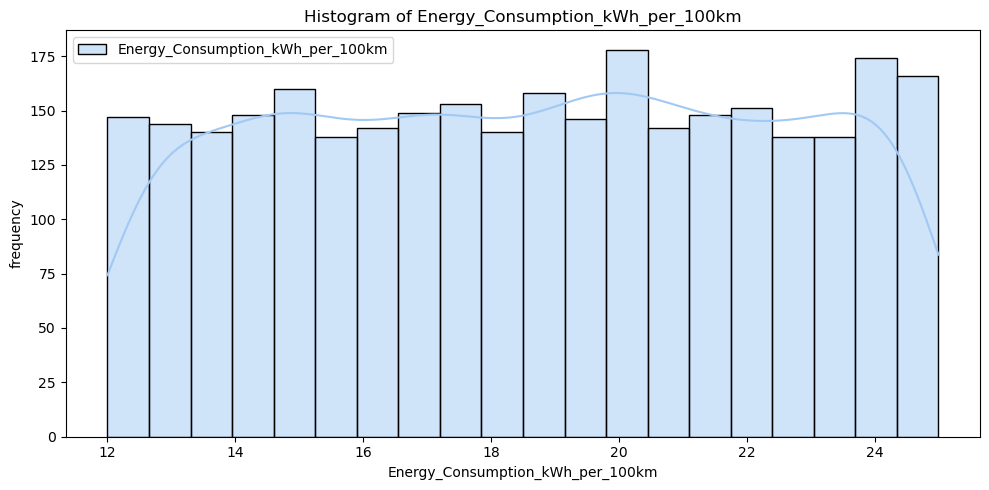

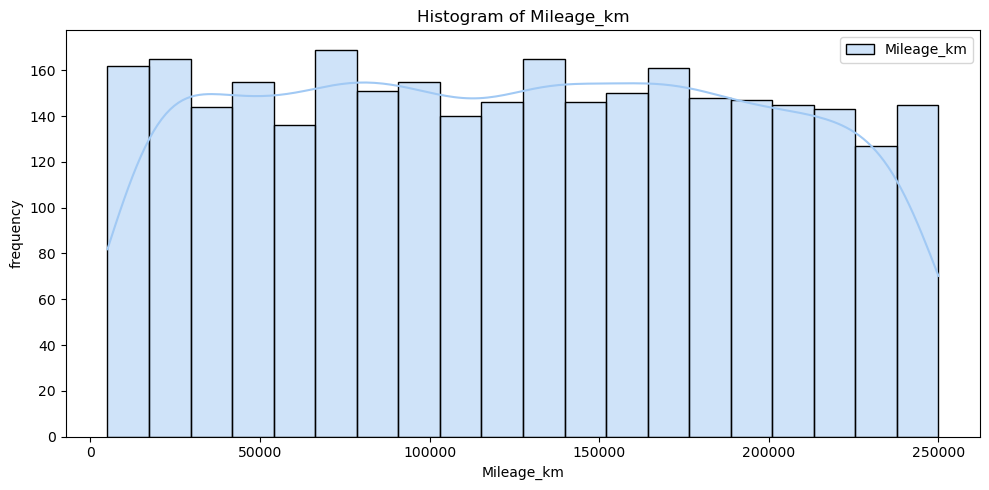

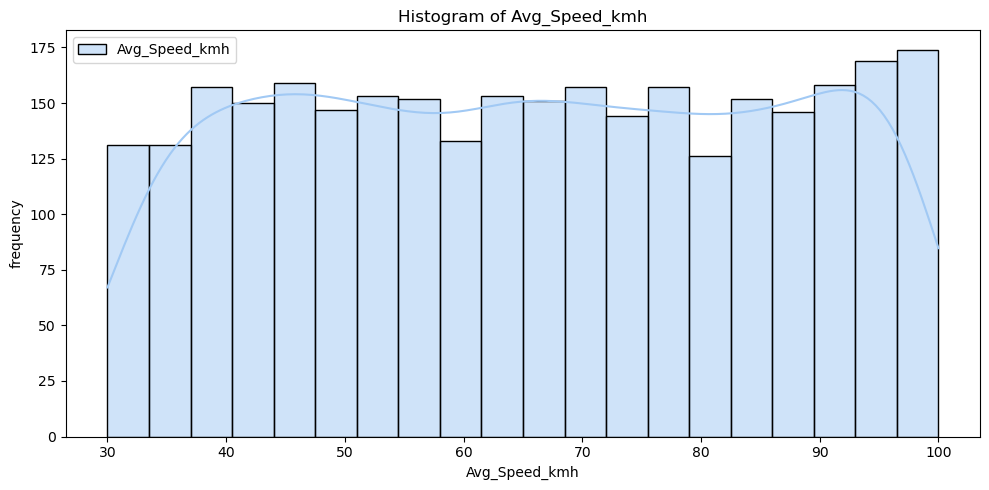

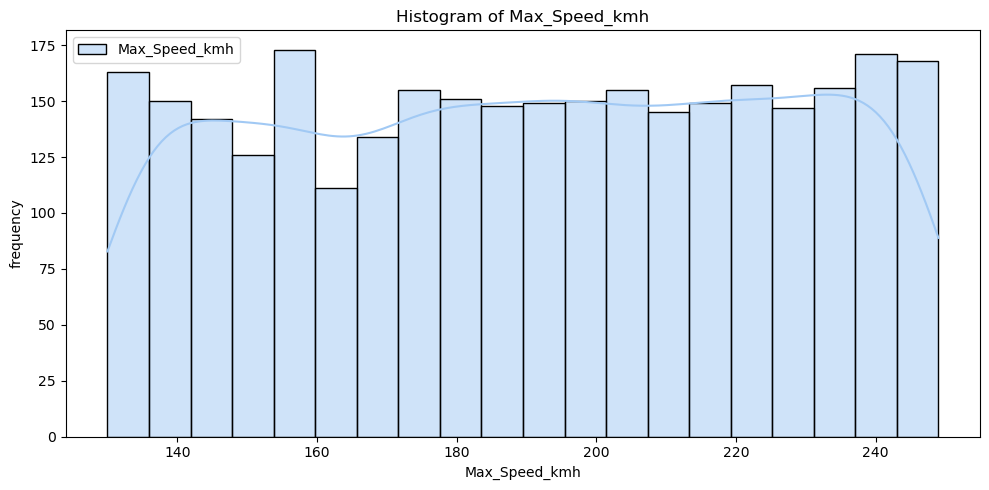

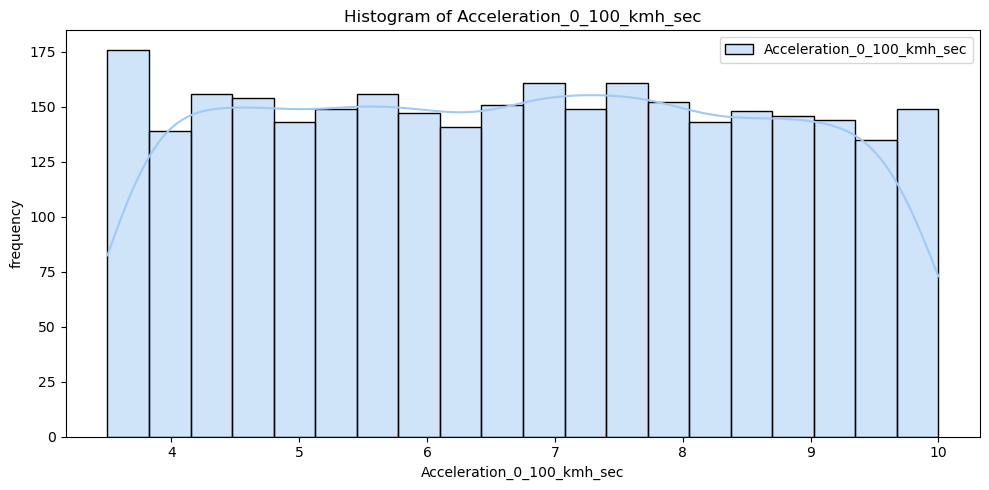

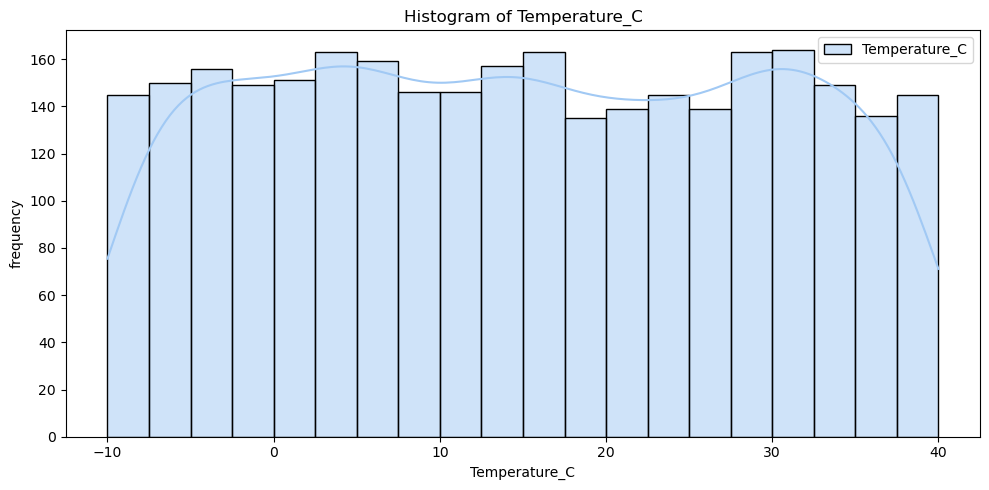

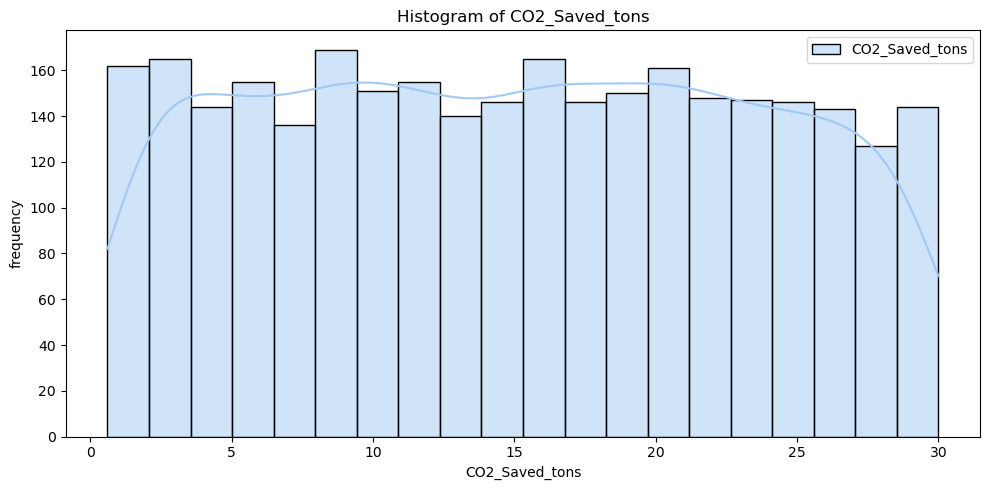

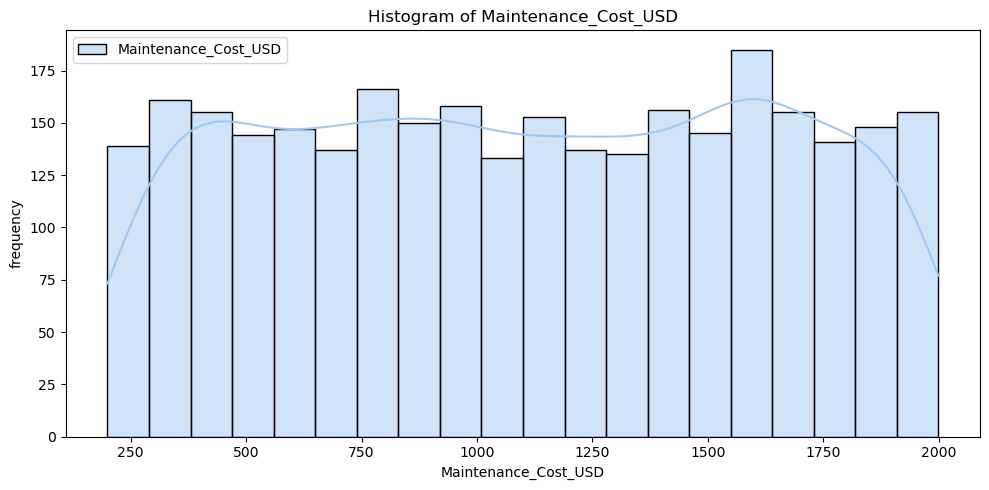

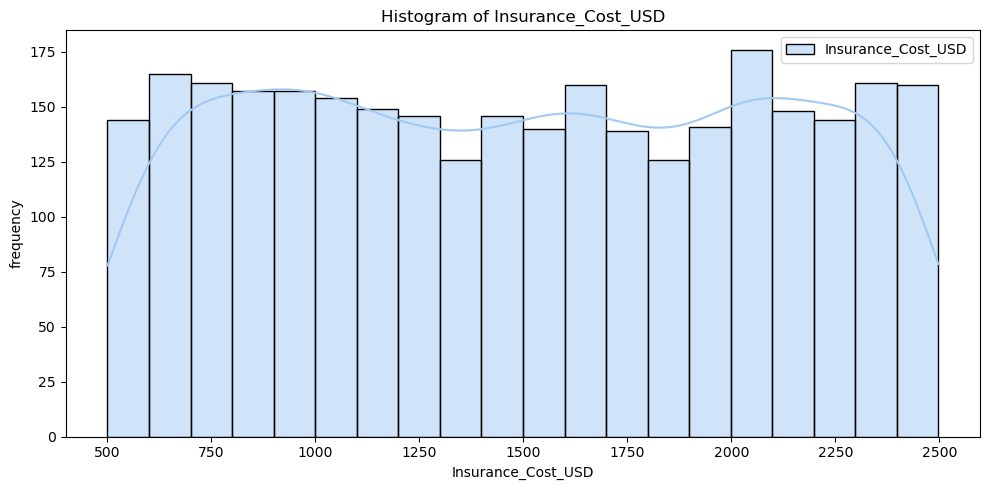

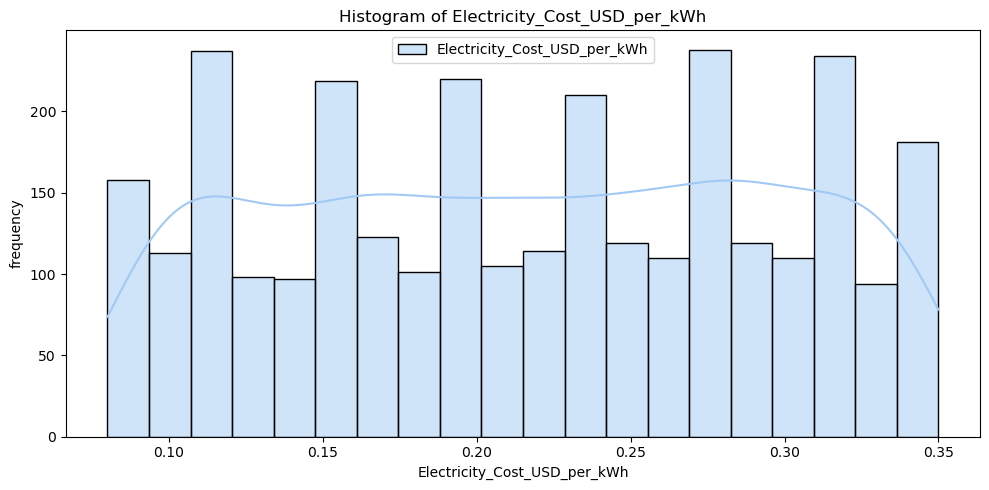

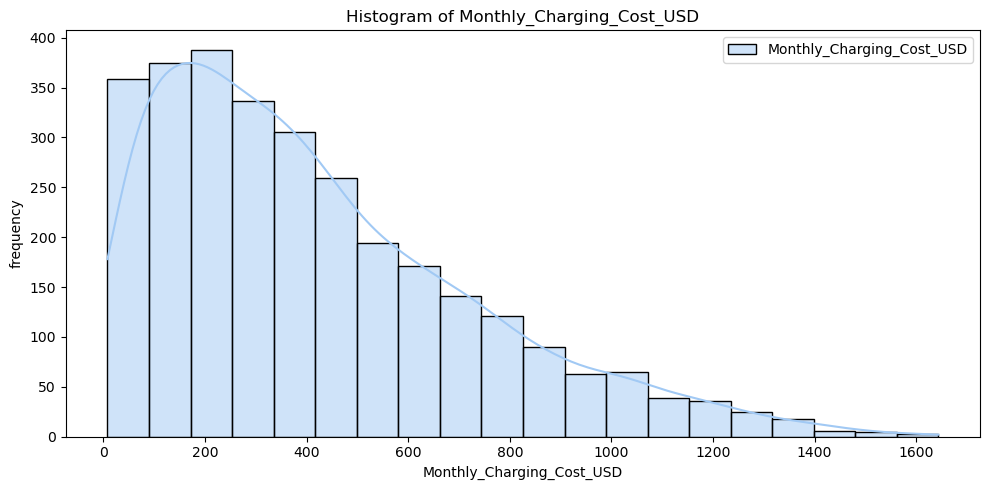

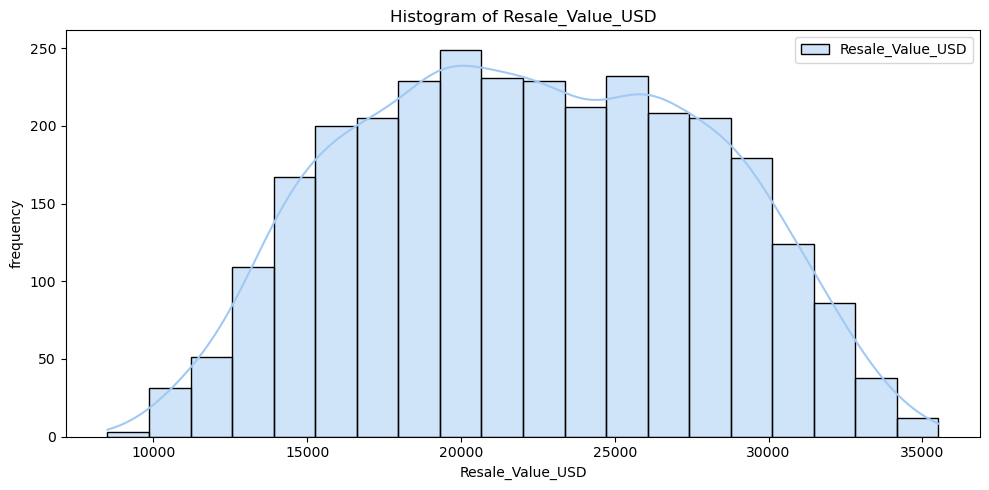

In [12]:
for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[[col]], kde=True, palette='pastel', bins=20)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('frequency')
    plt.tight_layout()
    plt.show()

### 2. Countplot Of Cat_Cols

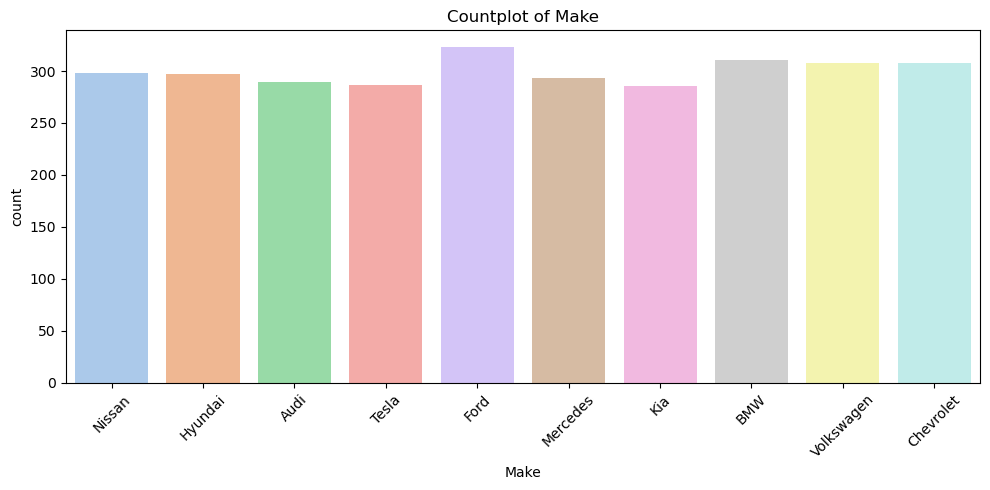

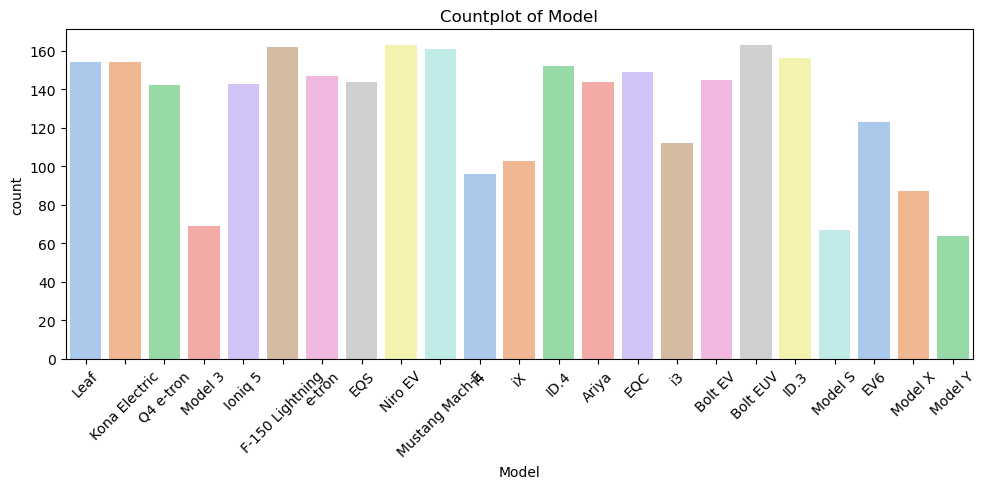

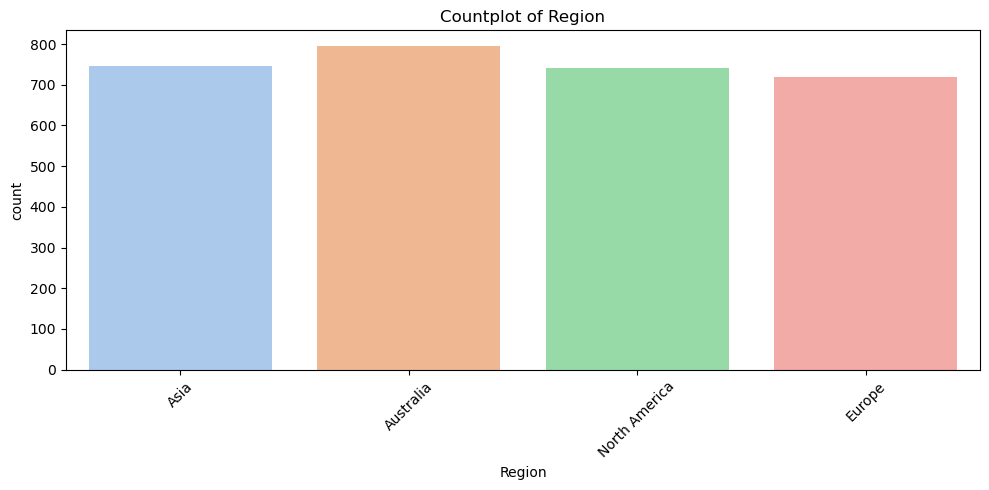

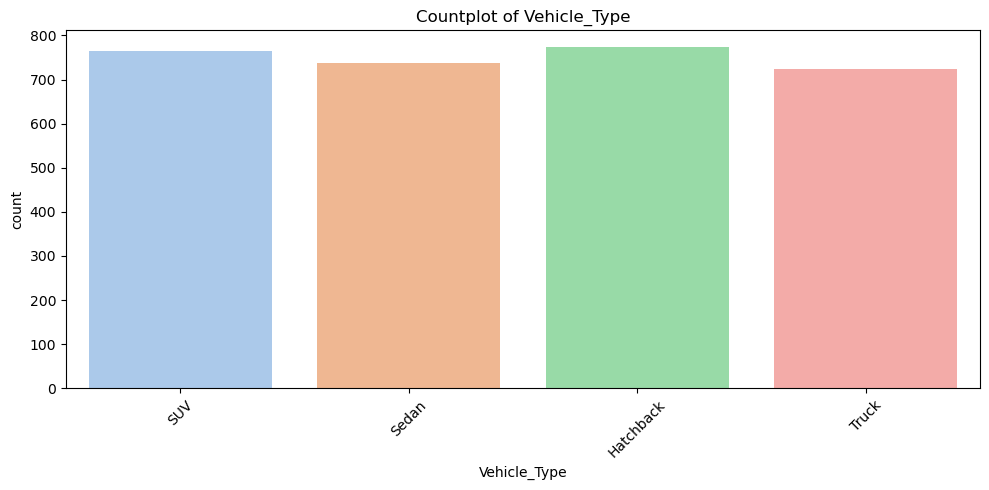

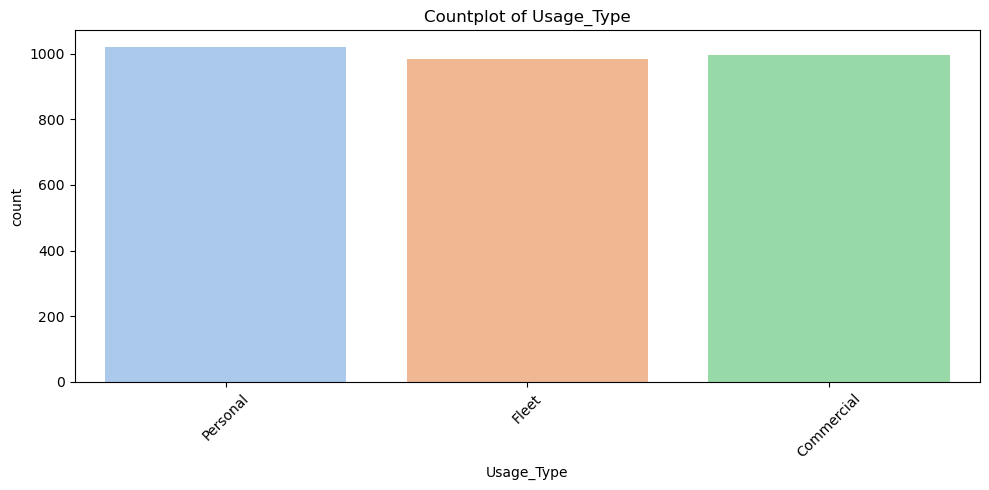

In [13]:
for col in cat_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, palette='pastel')
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### 3. Pie Chart: ReSales By Vehicle Type

In [14]:
vehicle_resales = df.groupby('Vehicle_Type')['Resale_Value_USD'].sum()

In [15]:
colors = ['#D991AB', '#F280DF', '#394A59', '#75B2BF', '#F2C8C4', '#67687', '#322759', '#F280BF']

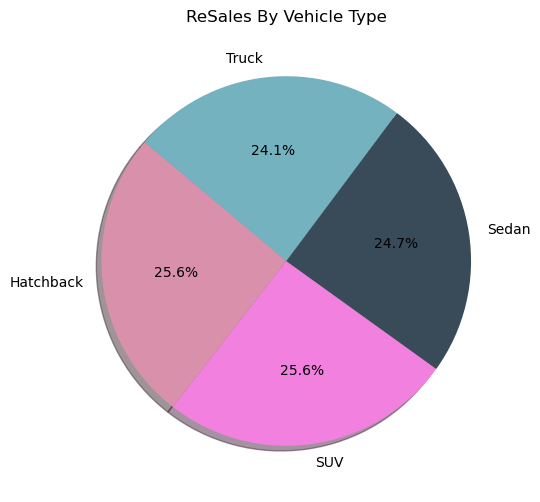

In [18]:
plt.figure(figsize=(12, 6))
plt.pie(vehicle_resales, labels=vehicle_resales.index, autopct='%1.1f%%', colors=colors, startangle=140, shadow=True)
plt.title('ReSales By Vehicle Type')
plt.show()

### 4. Box Plot: Monthly Charging Cost By Vehicle Make

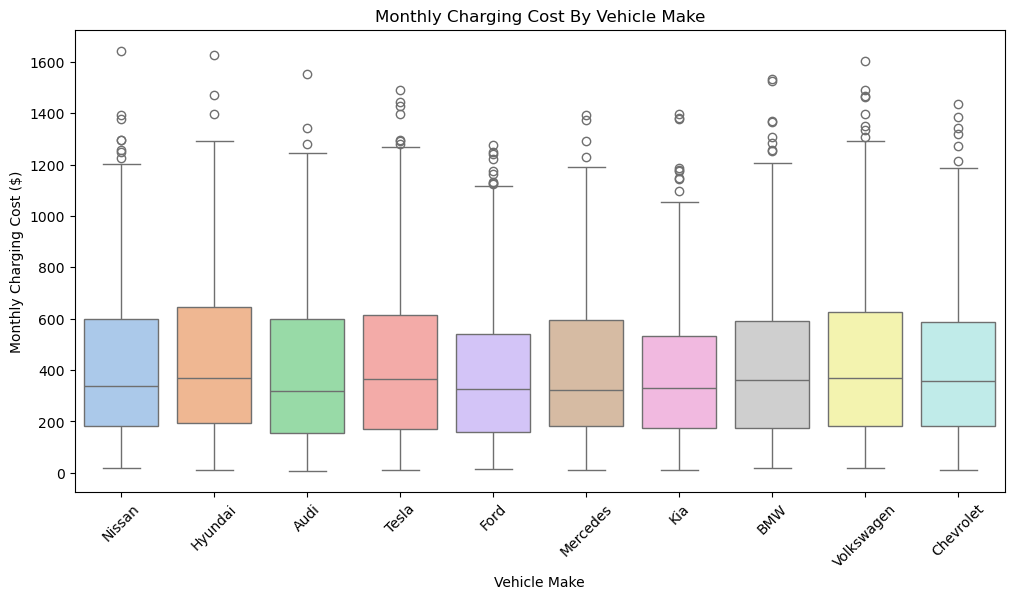

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Make', y='Monthly_Charging_Cost_USD', data=df, palette='pastel')
plt.title('Monthly Charging Cost By Vehicle Make')
plt.xlabel('Vehicle Make')
plt.ylabel('Monthly Charging Cost ($)')
plt.xticks(rotation=45)
plt.show()

### 5. Violin Plot: Region vs ReSale Value	

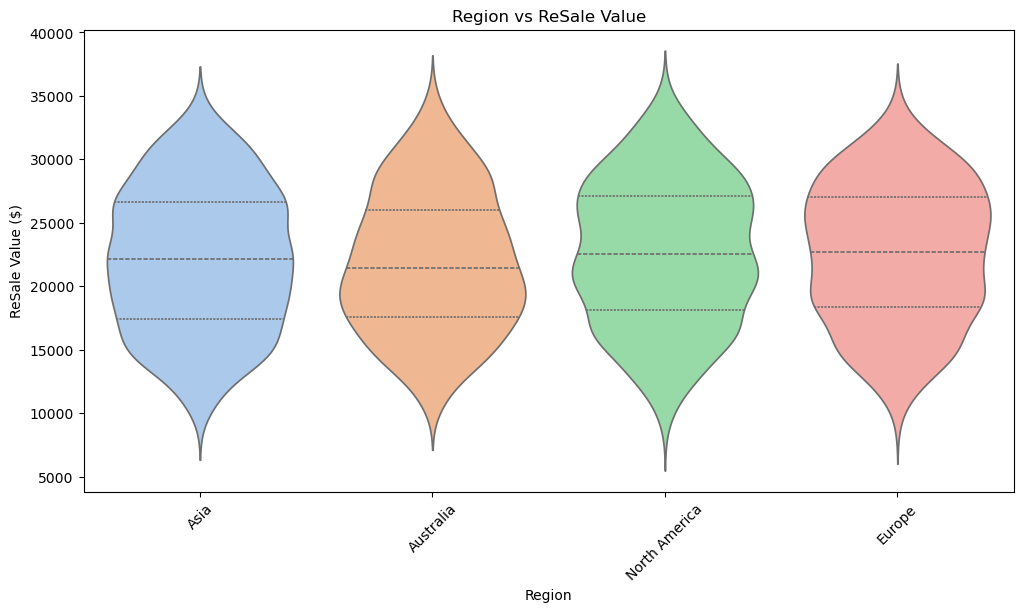

In [20]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Region', y='Resale_Value_USD', data=df, palette='pastel', inner='quartile')
plt.title('Region vs ReSale Value')
plt.xlabel('Region')
plt.ylabel('ReSale Value ($)')
plt.xticks(rotation=45)
plt.show()

### 6. Scatter Plot: Vehicle Make ReSale Value By Usage Type

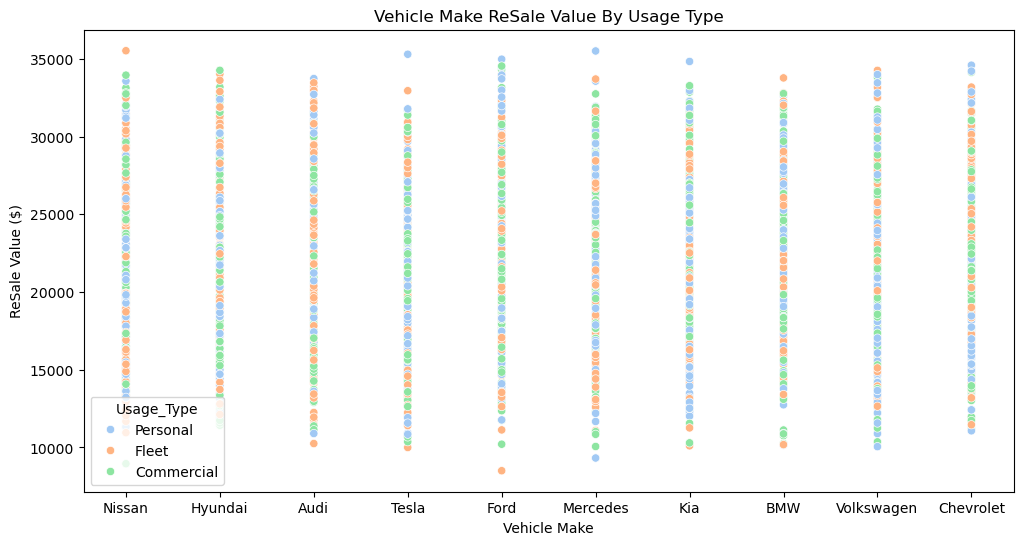

In [21]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['Make'], y=df['Resale_Value_USD'], hue=df['Usage_Type'], palette='pastel')
plt.title('Vehicle Make ReSale Value By Usage Type')
plt.xlabel('Vehicle Make')
plt.ylabel('ReSale Value ($)')
plt.show()

### 7. Top ReSale Value By Model

In [22]:
top_resale_model = df.groupby('Model')['Resale_Value_USD'].sum().sort_values(ascending=False).head(10)
top_resale_model

Model
F-150 Lightning    3685942
Bolt EUV           3664534
Niro EV            3654363
Mustang Mach-E     3612723
ID.3               3455931
Kona Electric      3432504
EQS                3314320
EQC                3313883
Leaf               3311002
Q4 e-tron          3279491
Name: Resale_Value_USD, dtype: int64

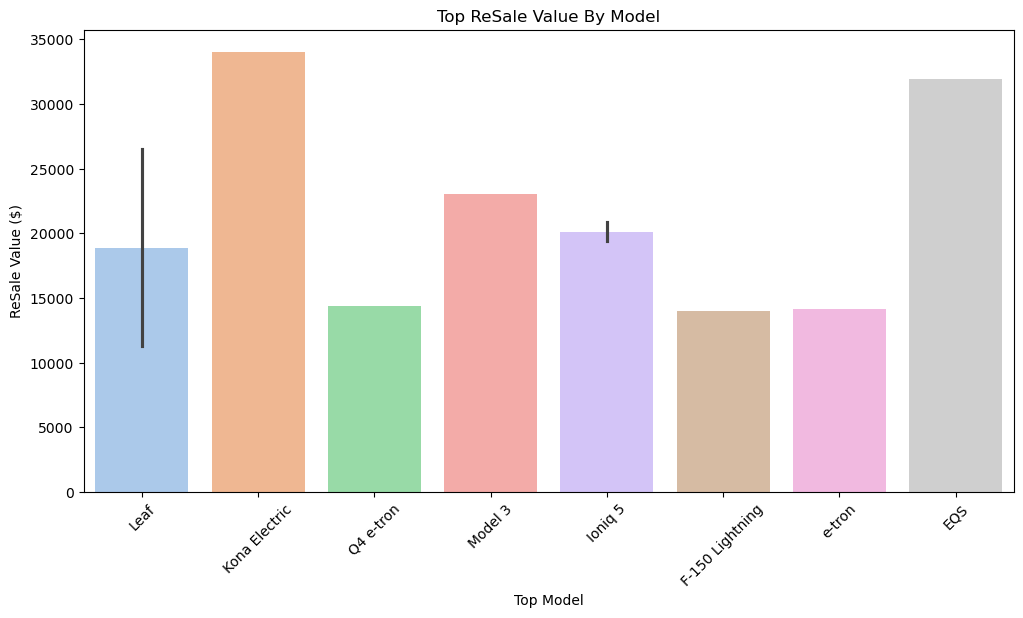

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df['Model'].head(10), y=df['Resale_Value_USD'], palette='pastel')
plt.title('Top ReSale Value By Model')
plt.xlabel('Top Model')
plt.ylabel('ReSale Value ($)')
plt.xticks(rotation=45)
plt.show()

## Predictive Modeling

In [24]:
df['Make'].unique()

array(['Nissan', 'Hyundai', 'Audi', 'Tesla', 'Ford', 'Mercedes', 'Kia',
       'BMW', 'Volkswagen', 'Chevrolet'], dtype=object)

In [25]:
df['Model'].unique()

array(['Leaf', 'Kona Electric', 'Q4 e-tron', 'Model 3', 'Ioniq 5',
       'F-150 Lightning', 'e-tron', 'EQS', 'Niro EV', 'Mustang Mach-E',
       'i4', 'iX', 'ID.4', 'Ariya', 'EQC', 'i3', 'Bolt EV', 'Bolt EUV',
       'ID.3', 'Model S', 'EV6', 'Model X', 'Model Y'], dtype=object)

In [26]:
df['Region'].unique()

array(['Asia', 'Australia', 'North America', 'Europe'], dtype=object)

In [27]:
df['Vehicle_Type'].unique()

array(['SUV', 'Sedan', 'Hatchback', 'Truck'], dtype=object)

In [28]:
df['Usage_Type'].unique()

array(['Personal', 'Fleet', 'Commercial'], dtype=object)

In [29]:
df = df.drop(['Vehicle_ID'], axis=1)

In [30]:
df = df.drop(['Model'], axis=1)

In [32]:
df = df.drop(['Year'], axis=1)

In [31]:
val = {'Region': {'Asia': 0, 'Australia': 1, 'North America': 2, 'Europe': 3}, 
       'Vehicle_Type': {'SUV': 0, 'Sedan': 1, 'Hatchback': 2, 'Truck': 3},
       'Usage_Type': {'Personal': 0, 'Fleet': 1, 'Commercial': 2},
       'Make': {'Nissan': 0, 'Hyundai': 1, 'Audi': 2, 'Tesla': 3, 'Ford': 4, 'Mercedes': 5, 'Kia': 6, 'BMW': 7, 'Volkswagen': 8, 'Chevrolet': 9}
       }
df.replace(val, inplace=True)
df

,Make,Year,Region,Vehicle_Type,Battery_Capacity_kWh,Battery_Health_%,Range_km,Charging_Power_kW,Charging_Time_hr,Charge_Cycles,...,Max_Speed_kmh,Acceleration_0_100_kmh_sec,Temperature_C,Usage_Type,CO2_Saved_tons,Maintenance_Cost_USD,Insurance_Cost_USD,Electricity_Cost_USD_per_kWh,Monthly_Charging_Cost_USD,Resale_Value_USD
0,0,2021,0,0,101.7,75.5,565,153.6,0.82,1438,...,233,8.10,-9.0,0,14.13,969,843,0.30,375.55,26483
1,0,2020,1,1,30.1,99.8,157,157.2,0.27,1056,...,221,9.83,1.6,0,19.41,1157,1186,0.25,532.02,11287
2,1,2021,2,0,118.5,84.0,677,173.6,0.84,1497,...,138,3.60,1.5,1,29.39,291,1890,0.26,1291.68,34023
3,2,2022,3,2,33.1,97.3,149,169.3,0.25,1613,...,192,8.97,12.5,1,6.96,401,2481,0.33,234.44,14398
4,3,2022,1,3,81.3,85.6,481,212.8,0.43,1078,...,189,7.03,-3.0,2,2.06,214,2336,0.10,32.61,23033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,5,2021,2,0,57.2,84.0,239,102.2,0.69,1242,...,154,7.98,33.7,0,15.65,1645,2357,0.33,767.05,16749
2996,4,2022,3,2,98.4,83.1,498,160.6,0.74,1793,...,243,7.22,13.7,1,1.82,289,868,0.32,75.35,30080
2997,6,2024,3,3,35.1,82.1,189,18.1,2.56,1184,...,175,4.26,5.8,1,26.29,1013,695,0.32,1188.15,16286
2998,5,2015,2,3,69.4,98.4,336,94.7,0.90,418,...,185,9.34,-7.6,2,24.95,1843,1905,0.20,780.03,19581


### 1. Train Test Split

In [35]:
features = ['Make', 'Region', 'Vehicle_Type', 'Charging_Time_hr', 'Energy_Consumption_kWh_per_100km', 'Acceleration_0_100_kmh_sec']
target = 'Usage_Type'

X = df[features]
y = df[target]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(2400, 6) (600, 6)


### 2. Models

In [37]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decison Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC()
}

In [38]:
best_model = None
best_accuracy = 0
best_model_name = ''

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'\n {name} Accuracy: {accuracy}')


 Logistic Regression Accuracy: 0.3616666666666667

 Decison Tree Accuracy: 0.32

 Random Forest Accuracy: 0.335

 Gradient Boosting Accuracy: 0.31333333333333335

 K-Nearest Neighbors Accuracy: 0.32166666666666666

 Support Vector Machine Accuracy: 0.31333333333333335


#### Best Model

In [39]:
if accuracy > best_accuracy:
    best_accuracy = accuracy
    best_model = model
    best_model_name = name
    print(f'\n Best Model: {best_model_name} with Accuracy: {best_accuracy}')


 Best Model: Support Vector Machine with Accuracy: 0.31333333333333335


### 3. Classification Report

In [40]:
y_pred_best = best_model.predict(X_test)
print(f'\n Classification Report: \n', classification_report(y_test, y_pred_best))


 Classification Report: 
               precision    recall  f1-score   support

           0       0.32      0.33      0.32       210
           1       0.30      0.45      0.36       187
           2       0.32      0.17      0.22       203

    accuracy                           0.31       600
   macro avg       0.32      0.32      0.30       600
weighted avg       0.32      0.31      0.30       600



### 4. Confusion Matrix

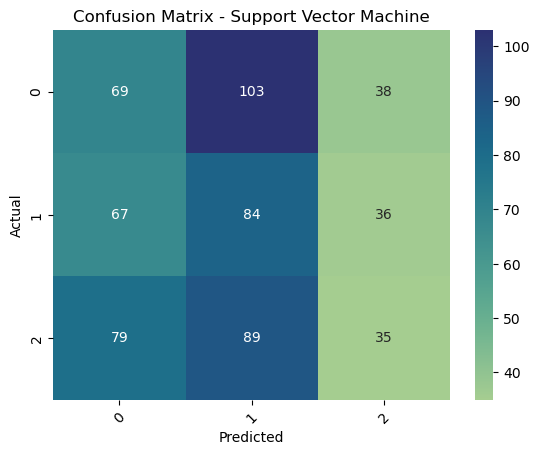

In [41]:
conf_matrix = confusion_matrix(y_test, y_pred_best)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='crest')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45)
plt.show()